In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

os.listdir("/content/drive/MyDrive/garbage_classification_2")
path = "/content/drive/MyDrive/garbage_classification_2/"

data = pd.DataFrame()

for category in os.listdir(path):
    temp = pd.DataFrame()
    temp['path'] = np.nan
    temp['target'] = category
    i = 0
    for photo in os.listdir(path+category):
        temp.loc[i, 'path'] = path+category+ "/" + photo
        temp.loc[i, 'filename'] = category+ "/" + photo
        temp.loc[i, 'target'] = category
        i += 1
    data = pd.concat([data, temp], ignore_index=True)
    del temp
    
print(len(data))

Mounted at /content/drive
7200


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./127,
    shear_range=0.2,
    zoom_range=0.2,                               
    horizontal_flip=True)

train=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=path,
    x_col='filename',
    y_col='target',
    target_size=(128,128),
    batch_size=32,
    class_mode ='categorical')

test=train_datagen.flow_from_dataframe(
    dataframe=test,
    directory=path,
    x_col='filename',
    y_col='target',
    target_size=(128,128),
    batch_size=32,
    class_mode ='categorical')

Found 5760 validated image filenames belonging to 12 classes.
Found 1440 validated image filenames belonging to 12 classes.


In [ ]:
from keras.models import Sequential
model=Sequential()

#model CNN
# input
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 3
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 4
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

# output
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(12,activation='Softmax'))

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

In [ ]:
history=model.fit(
    train,
    steps_per_epoch=len(train),
    batch_size = 32,
    epochs=50,
    validation_data=test,
    validation_steps=len(test),
    callbacks=callbacks,
    verbose = 1)

Epoch 1/50
180/180 [==============================] - 1745s 10s/step - loss: 3.0420 - accuracy: 0.0866 - val_loss: 2.4750 - val_accuracy: 0.1097
Epoch 2/50
180/180 [==============================] - 46s 254ms/step - loss: 2.3271 - accuracy: 0.1602 - val_loss: 2.2610 - val_accuracy: 0.1813
Epoch 3/50
180/180 [==============================] - 44s 246ms/step - loss: 2.1036 - accuracy: 0.2589 - val_loss: 2.0955 - val_accuracy: 0.2528
Epoch 4/50
180/180 [==============================] - 45s 249ms/step - loss: 1.8898 - accuracy: 0.3439 - val_loss: 1.9896 - val_accuracy: 0.3236
Epoch 5/50
180/180 [==============================] - 45s 248ms/step - loss: 1.7594 - accuracy: 0.3898 - val_loss: 1.7387 - val_accuracy: 0.3979
Epoch 6/50
180/180 [==============================] - 45s 250ms/step - loss: 1.5923 - accuracy: 0.4641 - val_loss: 1.5410 - val_accuracy: 0.4792
Epoch 7/50
180/180 [==============================] - 45s 248ms/step - loss: 1.4621 - accuracy: 0.5101 - val_loss: 1.6168 - val_ac

In [ ]:
model.save('Garbage_Classification_test4.h5')

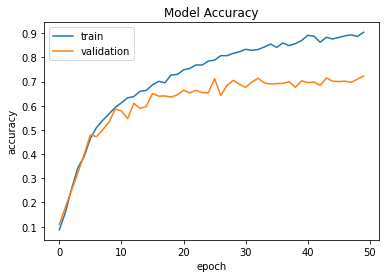

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

In [3]:
from keras.models import load_model
model = load_model('Garbage_Classification_test4.h5')

In [4]:
# Dat ten cho cac classes
classes = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes','green-glass', 
           'metal', 'paper', 'plastic', 'shoes','trash','white-glass']

Kết quả dự đoán:
brown-glass


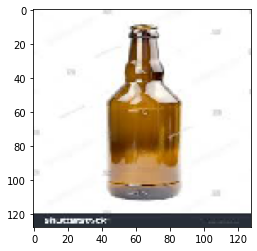

In [6]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

img = load_img('br_glass.jpg',target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,128,128,3)
img=img.astype('float32')
img = img/255
print("Kết quả dự đoán:")
print(classes[np.argmax(model.predict(img))])